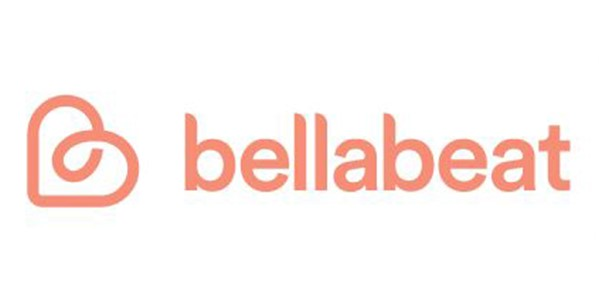

#  Bellabeat Case Study | Sreadsheet, SQL AND R

**CASE SCENARIO**

I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company. 

<span style="font-size:18px;"><span style="color:orange;"> **1. ASK PHASE** </span>
<br>
    
**1.1 Business task**

Gain insight into how consumers use non-Bellabeat smart devices in order to find new growth opportunities for the company Bellabeat.
<br>

**1.2 Key stakeholders**

* 1 - Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* 2- Sando Mur: Mathematician and Bellabeat’s cofounder.

<span style="font-size:18px;"><span style="color:orange;">**2. PREPARE PHASE** </span>

**2.1 Dataset**


FitBit Fitness Tracker Data set is available on Kaggle through Mobius for data source. 
It contains personal fitness tracker information from 30 fitbit users. 
I have downloaded the Data set, unzipped the files and stored them in a folder on my Desktop called “Bellabeat Case Study”.
Dataset is organized in 18 different files in .csv format.  
<br>
<br>
    
**2.2 Data integrity verification (ROCCC):**


* *Reliability:* Dataset not reliable. Small sample size (30).

* *Originality:*  Not original. Data was collected by a survey via Amazon Mechanical Turk.

* *Comprehensive:* Not enough information about individuals(Gender, age). DailyActivity dataset has only input from 33 users, and WeightLogInfo dataset from 8 users.

* *Current:* Not current. Data collected in 2016, therefore outdated. 

* *Cited:* No information regarding credible source.

<span style="font-size:18px;"><span style="color:orange;">**3. PROCESS PHASE**</span>

**3.1 Data Tools**
<br>
<br>
SQL BigQuery and Spreadsheet for data cleaning, manipulation and analysis. R for visualization.

**3.2 Data Cleaning and Manipulation:**
<br>
<br>
I am going to use **dailyActitivy_merged.csv** file as "dailyactivity" and **weightLogInfo_merged.csv** as "weights" for my analysis.

[See Google Sheets for Dataset(dailyactivity)](https://docs.google.com/spreadsheets/d/1qgH7PGIacb3uGGPU26NUustJq6PYZqaVmwxCca9BCjk/edit?usp=sharing)


[See Google Sheets for Dataset (weights)](https://docs.google.com/spreadsheets/d/1VEHZwTZ2ujXpBCipQ6nIc4LaM3eyZOgP2UZEWmV5JDY/edit?usp=sharing/)

In [ ]:
--Check for number of participants
    
SELECT DISTINCT Id as number_users
FROM `bella-beat-case-study-364908.bellabeat.daily_activity` 

SELECT DISTINCT Id as number_users
FROM `bella-beat-case-study-364908.bellabeat.weights`


--Check for Null values in columns I am going to use for analysis
    
SELECT *
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
WHERE ActivityDate IS NULL
OR TotalSteps IS NULL
OR Calories IS NULL
OR VeryActiveMinutes IS NULL
OR FairlyActiveMinutes IS NULL
OR LightlyActiveMinutes IS NULL
OR SedentaryMinutes IS NULL

SELECT *
FROM `bella-beat-case-study-364908.bellabeat.weights`
WHERE Id is NULL
OR WeightKg IS NULL
OR BMI IS NULL


--Check for duplicates

SELECT Id, ActivityDate, TotalSteps, 
COUNT (*)
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
GROUP BY Id, ActivityDate, TotalSteps
HAVING COUNT (*) > 1

SELECT Id, Date, WeightKg, BMI, 
COUNT (*)
FROM `bella-beat-case-study-364908.bellabeat.weights`
GROUP BY Id, Date, WeightKg, BMI
HAVING COUNT (*) > 1)


There are 33 users (33 Unique Id numbers) on "daily_activity" dataset and only 8 users (8 Unique Id numbers) in "weights" dataset. Not enough to perform an accurate analysis but will proceed for training purpose despite the limitations.

In [ ]:
--Round Column "WeigthKg" to 1 decimal and convert BMI Column from float to integer. 

SELECT Id, Date, 
ROUND(WeightKg, 1) AS WeightKg, 
CAST (BMI as int64) AS BMI
FROM `bella-beat-case-study-364908.bellabeat.weights`

<span style="font-size:18px;"><span style="color:orange;">**4. ANALYZE AND SHARE PHASES**</span>

<span style="font-size:18px;">**4.1 daily_activity dataset:**

In [ ]:
--Find time interval dataset was collected

SELECT Id, 
MIN (ActivityDate) AS min_activ_date, 
MAX (ActivityDate) AS max_activ_date
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
GROUP BY Id


--Check how many days each user submitted activity

SELECT Id, 
COUNT(Id) AS nr_of_days
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
GROUP BY Id
ORDER BY nr_of_days DESC

SELECT (avg(nr_of_days))
FROM (
SELECT  Id, COUNT(Id) AS nr_of_days
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
GROUP BY Id
ORDER BY nr_of_days DESC
)

[See Google Sheets for Results](https://docs.google.com/spreadsheets/d/1B6BEuIvHwkx-NfZB8H-CLNovSCXcF4iS1u0eIFvYMiQ/edit?usp=sharinghttps://docs.google.com/spreadsheets/d/1B6BEuIvHwkx-NfZB8H-CLNovSCXcF4iS1u0eIFvYMiQ/edit?usp=sharing)

* Data was collected between 12/04/2016 and 12/05/2016. 
* Only 21 of the 33 users submitted tracking activity for 31 days (64 % of all users). 
* Users submitted tracking activity on average for 28 days.

**4.1.1 ACTIVITY TYPE DISTRIBUTION**

In [ ]:
--Find total number of steps, calories and minutes of very active, fairly active, lightly active and sedentary activity level, for each user.

SELECT Id, 
SUM (TotalSteps) as total_steps, 
SUM(Calories) as total_calories, 
SUM (VeryActiveMinutes) as total_very_active_min,
SUM (FairlyActiveMinutes) as total_fairly_active_min,
SUM (LightlyActiveMinutes) as total_lightly_active_min,
SUM (SedentaryMinutes) as total_sedentary_min,
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
GROUP BY Id

[See Google Sheets for Results](https://docs.google.com/spreadsheets/d/1pRZKLl5avdVaFO3lf3lz9HV616FLQ6130q6AfnChL_w/edit?usp=sharing)

In [ ]:
--Find average number of steps, calories and average minutes of very active, fairly active, lightly active and sedentary activity level, for each user.

SELECT Id, 
ROUND(avg (TotalSteps)) as avg_steps, 
ROUND(avg(Calories)) as avg_calories, 
ROUND(avg (VeryActiveMinutes)) as avg_very_active_min,
ROUND(avg (FairlyActiveMinutes)) as avg_fairly_active_min,
ROUND(avg (LightlyActiveMinutes)) as avg_lightly_active_min,
ROUND(avg (SedentaryMinutes)) as avg_sedentary_min,
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
GROUP BY Id

[See Google Sheets for Results](https://docs.google.com/spreadsheets/d/1LZHyCml4pu7Cfmc59pzWfs-AO9gkQ0Jxh-ObDt0J-V8/edit?usp=sharing)

In [ ]:
-- Find the total amount of minutes spent by each user in each type of activity, per week

SELECT Id,
ROUND(SUM(total_very_active_min/31*7)) AS Very_Active,
ROUND(SUM(total_fairly_active_min/31*7)) AS Fairly_Active,
ROUND(SUM(total_lightly_active_min/31*7)) AS Lightly_Active,
ROUND(SUM(total_sedentary_min/31*7)) AS Sedentary
FROM (SELECT Id, 
SUM (TotalSteps) as total_steps, 
SUM(Calories) as total_calories, 
SUM (VeryActiveMinutes) as total_very_active_min,
SUM (FairlyActiveMinutes) as total_fairly_active_min,
SUM (LightlyActiveMinutes) as total_lightly_active_min,
SUM (SedentaryMinutes) as total_sedentary_min,
FROM `bella-beat-case-study-364908.bellabeat.daily_activity`
GROUP BY Id
)
GROUP BY Id

[See Google Sheets for Results](https://docs.google.com/spreadsheets/d/14HXaJ5YcnSPRMI0Slf9fHmU1hxR021DbB46WT-ULvRU/edit?usp=sharing)
<br>




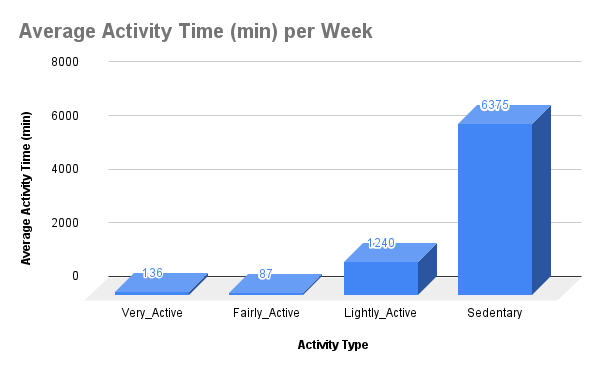

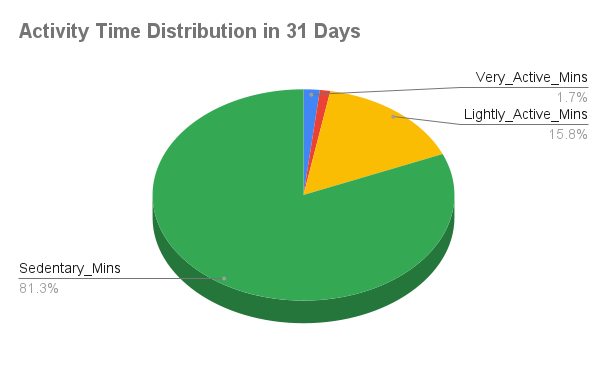

<br>
Per week, users spent on average, 136 minutes being Very Active, 87 minutes being Fairly Active, 1240 minutes being Lightly Active and 6375 minutes being Sedentary.
<br>
During 31 days, users spent 81% of their time being sedentary. Only 1.7% of users time are spent being Very Active.
<br>
<br>
According to the World Health Organization (WHO), adults aged 18–64 years should do at least 150–300 minutes of moderate-intensity (Fairly Active) aerobic physical activity per week, therefore users do not meet the recommended activity level, leading to an increase risk of health problems related with sedentary behaviour. (Source: https://www.who.int/news-room/fact-sheets/detail/physical-activity)

**4.1.2 STEPS VS CALORIES**


In [ ]:
#setting up R environment by installing packages and import datasets

install.packages("tidyverse")
install.packages("gridExtra")
library(tidyverse)
library(tidyverse)
library (ggplot2)
library(grid)
library(gridExtra)


sums_daily_activity <- read_csv("sums_daily_activity.csv")

View(sums_daily_activity)
steps_avgweight_avgBMI_nutritionalstatus <- read_csv("steps_avgweight_avgBMI_nutritionalstatus.csv")

View(steps_avgweight_avgBMI_nutritionalstatus)



In [ ]:
ggplot(data=sums_daily_activity, mapping=aes(x=total_calories, y=total_steps, color=total_calories)) + 
geom_point() + 
geom_smooth(method=lm) + 
labs (title =  "Steps VS Calories")


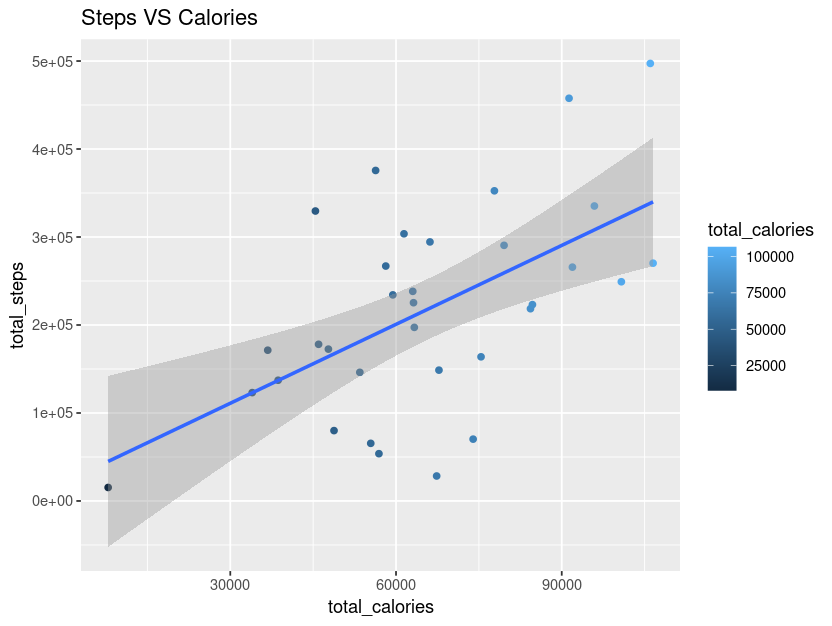
<br>
<br>
**Positive correlation** observed between total calories burned and total steps taken. It is evident that users burn more calories by increasing the number of steps. 

**4.1.3 CALORIES VS ACTIVITY LEVEL**


In [ ]:
#Plotting lightly active, fairly active, very active and sedentary minutes:

ggveryactivemin<-ggplot(data=sums_daily_activity, mapping=aes(x=total_very_active_min, y=total_calories, color=total_calories)) + 
geom_point(color="orange") + 
geom_smooth(formula = y ~ x,method=lm) + 
labs (title = "Calories VS Very Active Min") 

ggfairlyactivemin<-ggplot(data=sums_daily_activity, mapping=aes(x=total_fairly_active_min, y=total_calories, color=total_calories)) + 
geom_point(color="orange") + 
geom_smooth(formula = y ~ x,method=lm) + 
labs (title = "Calories VS Fairly Active Min") 

gglightlyactivemin<-ggplot(data=sums_daily_activity, mapping=aes(x=total_lightly_active_min, y=total_calories, color=total_calories)) + 
geom_point(color="orange") + 
geom_smooth(formula = y ~ x,method=lm) + 
labs (title = "Calories VS Lightly Active Min") 

ggsedentarymin<- ggplot(data=sums_daily_activity, mapping=aes(x=total_sedentary_min, y=total_calories, color=total_calories)) + 
geom_point(color="orange") + 
geom_smooth(formula = y ~ x,method=lm) + 
labs (title = "Calories VS Sedentary") 

grid.arrange(ggveryactivemin, ggfairlyactivemin, gglightlyactivemin, ggsedentarymin, ncol=2)

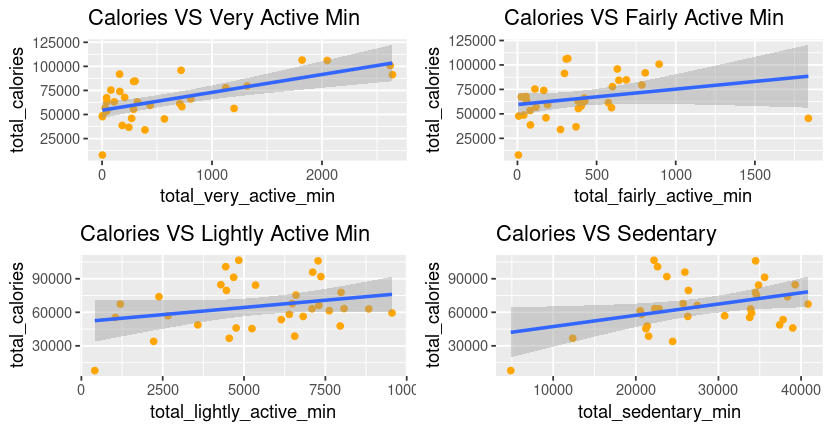
<br>
<br>
We can see that Very Active minutes and Calories burned has the **strongest correlation**. Users burn more calories by increasing the amount of time being very active. 
However, we can also see a positive correlation even in Sedentary group because a person also burns calories just to keep body functioning at rest (Basic Metabolic Rate).

<span style="font-size:18px;">**4.2 weights dataset:**

In [ ]:
--Find average weight, average BMI and the prevalence of users across the different BMI categories who fall in normal weight, pre-obesity or obesity range.

SELECT Id, average_weight, average_BMI, 
CASE WHEN average_BMI >= 25.0 AND average_BMI <= 29.9 THEN "Pre-obese"
WHEN average_BMI >= 30.0  THEN "Obese"
ELSE "Normal Weight"
END AS nutritional_status
FROM (SELECT Id, 
ROUND(AVG(WeightKg), 1) AS average_weight, 
ROUND(AVG (BMI)) AS average_BMI,
FROM `bella-beat-case-study-364908.bellabeat.weights_v2`
GROUP BY Id)


[See Google Sheets for Results](https://docs.google.com/spreadsheets/d/1-JGpH0_gGaaEVLT38lCIiSo9KJ3OTyhAYvv2QdAD1Vw/edit?usp=sharing)

In [ ]:
-- Combine avgweight_avgBMI_nutritional_status table (alias "table1") and average steps from averages table(alias "table2"), with join “Id” condition.

SELECT table2.Id as Id, 
table2.avg_steps as steps, 
table1.average_weight as avg_weight, 
table1.average_BMI as avg_BMI, table1.nutritional_status as nutritional_status
FROM `bella-beat-case-study-364908.bellabeat.avgweight_avgBMI_nutritional_status` as table1
INNER JOIN `bella-beat-case-study-364908.bellabeat.averages` as table2 ON table1.Id = table2.Id

[See Google Sheets for Results](https://docs.google.com/spreadsheets/d/1Fi3nVUmQncYCaVMLgxEghUfo7qWSZBPvmUzTkhxHhSQ/edit?usp=sharing)

**4.2.1 WEIGHT VS BMI**

In [ ]:
ggplot(data=steps_avgweight_avgBMI_nutritionalstatus, mapping = aes(x=avg_weight, y=avg_BMI)) + 
geom_point() + 
geom_smooth(method = "loess",color="orange") + 
labs (title = "Weight VS BMI" )


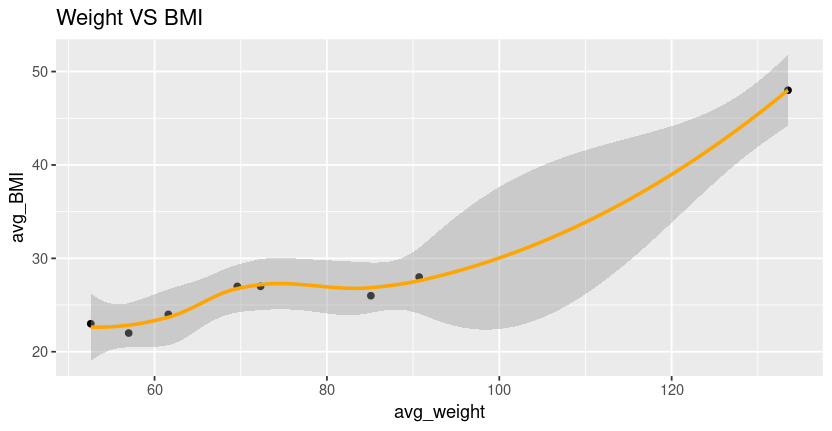

**4.2.2 STEPS VS BMI**

In [ ]:
ggplot(data=steps_avgweight_avgBMI_nutritionalstatus, mapping=aes(x=avg_BMI, y=steps, color=avg_BMI)) + 
geom_point() + 
geom_smooth(method=lm) + 
labs (title =  "Steps VS BMI")


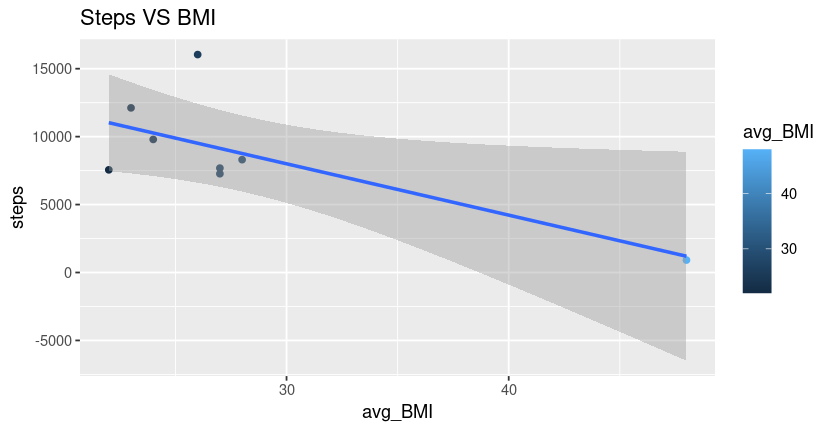

**4.2.3 USER NUTRITIONAL STATUS**

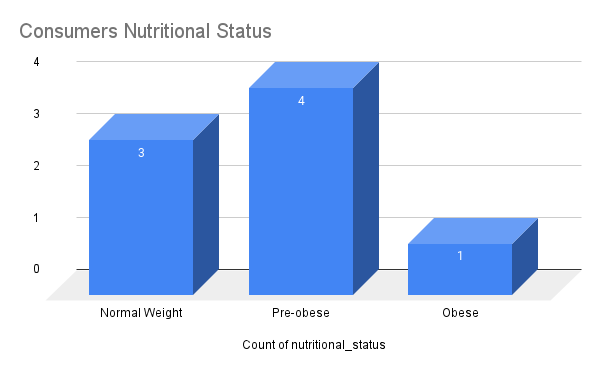
<br>
<br>
There is a clear relationship between BMI and Steps. Users with higher step count have lower BMI. In a study conducted by a research team and investigators from NIH’s National Cancer Institute (NCI) and National Institute on Aging (NIA) and the Centers for Disease Control and Prevention (CDC) found that "higher step counts are associated with lower rates of death from heart disease and cancer. These benefits were consistent across age, sex, and race groups."
<br>
<br>
Among 8 users, only 3 <b>(37.5%)</b> are in the <b>normal weight range</b>.  According to the World Health Organization, healthy range of BMI is 18.5 – 24.9, (source: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations) which is linked to health and well-being.

<span style="font-size:18px;"><span style="color:orange;">**5. ACT**</span>

**5.1 Recomendations**
<br>
<br>
* Since only 64% of consumers used the fitness watch for the 31 days, reinforce by email or App, about the importance of wearing a fitness to track activity level for accurate estimates, if user not using fitness watch for more than 1 day. 
<br>
<br>
* Only 8 users of the 33, logged weight manually, perhaps Bellabeat should introduce a <b>smart scale</b> as a new product, to log weight automatically into the App.
    <br>
    <br>
* Target users with pre-obese and obese BMI (Healthy range 18.5 – 24.9) to educate them via App about how to maintain a healthy weight (ex: recommend a daily <b> goal of steps, daily healthy recipes</b>) and health benefits associated.
    <br>
<br>
* Send via email or App a <b>weekly report</b>  of the total amount of steps and calories burnt to increase awareness about the importance of regular physical activity and weight management (increase calorie deficit by increasing number of steps). 
    <br>
    <br>
* Notify users when prolonged minutes of inactivity are detected by Bellabeat watch during the day <b>(push notification)</b>
<br>
<br>
* <b>Weekly challenge</b> between Bellabeat users (ex: user with the highest amount of steps / calories / minutes of high activity at the end of each week will have discounts on Bellabeat products) and advertise this benefit to convince other users using a different fitness watch to switch Bellabeat's.
<br>
<br>

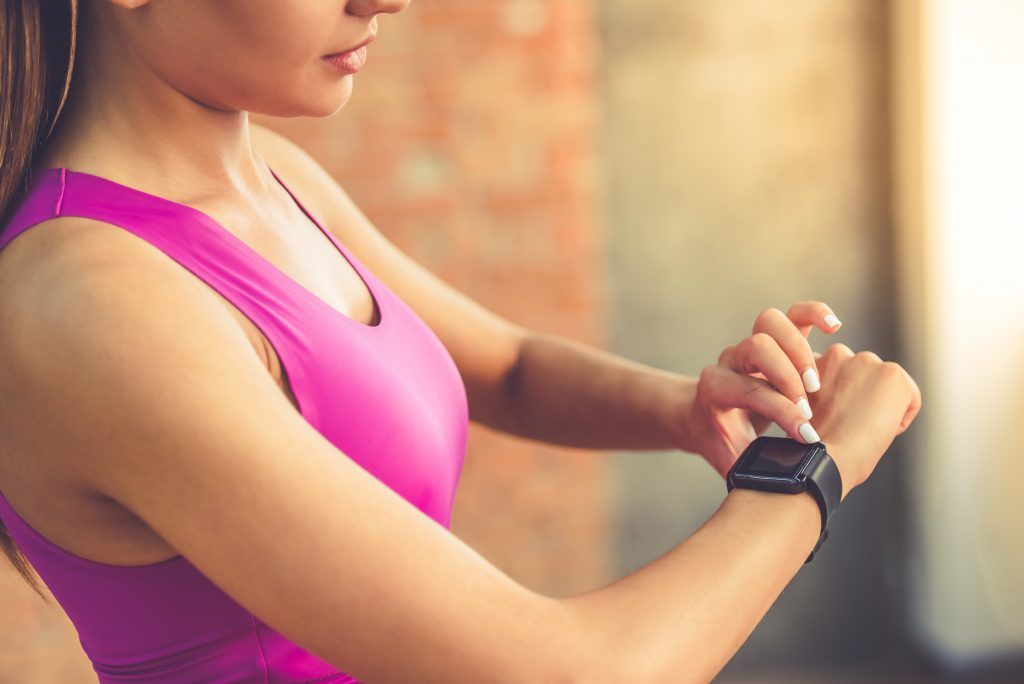